# NGCC Steam Cycle Subflowsheet

To reduce the complexity of the NGCC model, it is broken into three parts 1) gas turbine, 2) heat recovery steam generator, and 3) steam turbine. This notebook demonstrates running and getting results for the steam cycle section.

The steam turbine model is sized for an NGCC that produces approximatly 650 MWe net when carbon capture is included.

## Import Needed Modules

In [1]:
import os
from IPython.core.display import SVG
import idaes
import pyomo.environ as pyo
from idaes.core.solvers import use_idaes_solver_configuration_defaults
from idaes.core.util.scaling import calculate_scaling_factors
from idaes.core.util.model_statistics import degrees_of_freedom
import idaes.logger as idaeslog
import idaes.core.util.scaling as iscale
import steam_turbine

## Use the IDAES solver config

Tell any solvers that are created here on to use IDAES configuration and set the ipopt scaling method to 'user scaling' to pick up the variable scale factors.

In [2]:
use_idaes_solver_configuration_defaults()
idaes.cfg.ipopt.options.nlp_scaling_method = "user-scaling"

## Create an initialize the model

This gets the flowsheet set up with input that should be consitent with the 650 MWe NGCC with carbon capture. This also runs the initialization routine to populate variables with values that should make the model solvable.

In [3]:
m = pyo.ConcreteModel()
m.fs = steam_turbine.SteamTurbineFlowsheet(default={"dynamic":False})
calculate_scaling_factors(m)
m.fs.initialize(outlvl=idaeslog.NOTSET, load_from=None)
assert degrees_of_freedom(m) == 0

2022-02-28 13:47:30 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.reboiler.control_volume.heat
2022-02-28 13:47:31 [INFO] idaes.init.fs.steam_turbine.inlet_split: Initialization Complete: optimal - Optimal Solution Found
2022-02-28 13:47:31 [INFO] idaes.init.fs.steam_turbine.inlet_stage[1]: Initialization Complete: optimal - Optimal Solution Found
2022-02-28 13:47:32 [INFO] idaes.init.fs.steam_turbine.inlet_stage[2]: Initialization Complete: optimal - Optimal Solution Found
2022-02-28 13:47:32 [INFO] idaes.init.fs.steam_turbine.inlet_stage[3]: Initialization Complete: optimal - Optimal Solution Found
2022-02-28 13:47:33 [INFO] idaes.init.fs.steam_turbine.inlet_stage[4]: Initialization Complete: optimal - Optimal Solution Found
2022-02-28 13:47:33 [INFO] idaes.init.fs.steam_turbine.inlet_mix: Initialization Complete: optimal - Optimal Solution Found
2022-02-28 13:47:38 [INFO] idaes.init.fs.steam_turbine.outlet_stage: Initialization Complete (Outlet Stage): optimal - O

In [4]:
# load initialized model from file as a test
assert os.path.exists("steam_turbine_init.json.gz")
m.fs.initialize(outlvl=idaeslog.NOTSET, load_from="steam_turbine_init.json.gz")
assert degrees_of_freedom(m) == 0

## Solve Flowsheet

In [5]:
solver = pyo.SolverFactory("ipopt")
res = solver.solve(m, tee=True, symbolic_solver_labels=True)
assert pyo.check_optimal_termination(res)

Ipopt 3.13.2: nlp_scaling_method=user-scaling
tol=1e-06


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

## See PFD with Streams Labeled

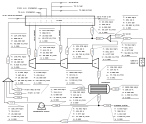

In [6]:
display(SVG(m.fs.write_pfd()))

In [7]:
streams_df = m.fs.steam_streams_dataframe()

## Show the Stream Table

In [8]:
display(streams_df)

,mass flow (kg/s),molar enthalpy (kJ/mol),mole flow (kmol/s),pressure (bar),temperature (K),vapor fraction (None),volumetric flow (m**3/s)
cw01,3603.056,1.9,200.0,5.0,298.192291,0.0,3.613113
cw02,3603.056,3.128251,200.0,5.0,314.508088,0.0,3.632608
t01,124.378162,63.585932,6.904037,165.0,858.0,1.0,2.727083
t02,124.378162,55.584028,6.904037,33.502372,613.696113,1.0,9.815977
t02_dummy,124.378162,55.584028,6.904037,33.502372,613.696113,1.0,9.815977
t03,124.378162,65.675536,6.904037,33.502372,858.0,1.0,14.453431
t03_dummy,124.378162,65.675536,6.904037,33.502372,858.0,1.0,14.453431
t04,124.378162,55.739817,6.904037,4.977126,587.381016,1.0,67.000654
t05,54.04584,56.207126,3.0,6.0,601.0,1.0,24.681559
t06,106.361098,55.881368,5.903938,4.977126,591.180113,1.0,57.681664


## Check Result

In [9]:
print(f"Steam turbine power {m.fs.tags['power']} (negative is power out).")

Steam turbine power -189.64 MW (negative is power out).


In [10]:
import pytest
assert m.fs.tags['power'].value == pytest.approx(-189.64, rel=1e-3)

In [11]:
jac, nlp = iscale.get_jacobian(m, scaled=True)
print("Extreme Jacobian entries:")
for i in iscale.extreme_jacobian_entries(jac=jac, nlp=nlp, large=100):
    print(f"    {i[0]:.2e}, [{i[1]}, {i[2]}]")
print("Unscaled constraints:")
for c in iscale.unscaled_constraints_generator(m):
    print(f"    {c}")
print("Scaled constraints by factor:")
for c, s in iscale.constraints_with_scale_factor_generator(m):
    print(f"    {c}, {s}")
print("Badly scaled variables:")
for v, sv in iscale.badly_scaled_var_generator(m, large=1e2, small=1e-2, zero=1e-12):
    print(f"    {v} -- {sv} -- {iscale.get_scaling_factor(v)}")
print(f"Jacobian Condition Number: {iscale.jacobian_cond(jac=jac):.2e}")

Extreme Jacobian entries:
    2.38e+03, [fs.steam_turbine.throttle_valve[1].pressure_flow_equation[0.0], fs.steam_turbine.throttle_valve[1].control_volume.properties_in[0.0].pressure]
    2.38e+03, [fs.steam_turbine.throttle_valve[1].pressure_flow_equation[0.0], fs.steam_turbine.throttle_valve[1].control_volume.properties_out[0.0].pressure]
    2.38e+03, [fs.steam_turbine.throttle_valve[2].pressure_flow_equation[0.0], fs.steam_turbine.throttle_valve[2].control_volume.properties_in[0.0].pressure]
    2.38e+03, [fs.steam_turbine.throttle_valve[2].pressure_flow_equation[0.0], fs.steam_turbine.throttle_valve[2].control_volume.properties_out[0.0].pressure]
    2.38e+03, [fs.steam_turbine.throttle_valve[3].pressure_flow_equation[0.0], fs.steam_turbine.throttle_valve[3].control_volume.properties_in[0.0].pressure]
    2.38e+03, [fs.steam_turbine.throttle_valve[3].pressure_flow_equation[0.0], fs.steam_turbine.throttle_valve[3].control_volume.properties_out[0.0].pressure]
    2.38e+03, [fs.steam